# United States Income: Divided Along Demographics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.shape

(48842, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='hours-per-week'>

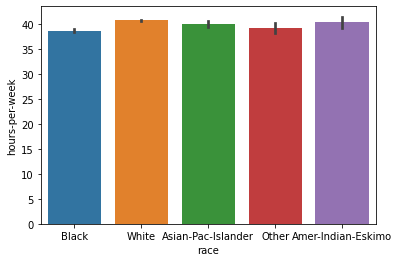

In [9]:
sns.barplot(data=data, x='race', y='hours-per-week')

<AxesSubplot:xlabel='race', ylabel='count'>

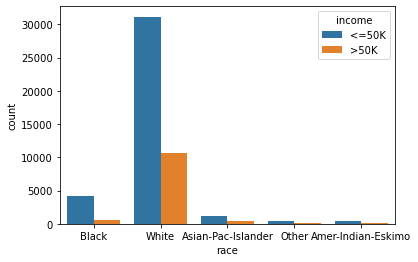

In [10]:
sns.countplot(data=data, x='race', hue='income')

In [11]:
races = list(data.race.unique())

In [12]:
data[data.race=='White'].income.value_counts(normalize=True)

<=50K    0.746013
>50K     0.253987
Name: income, dtype: float64

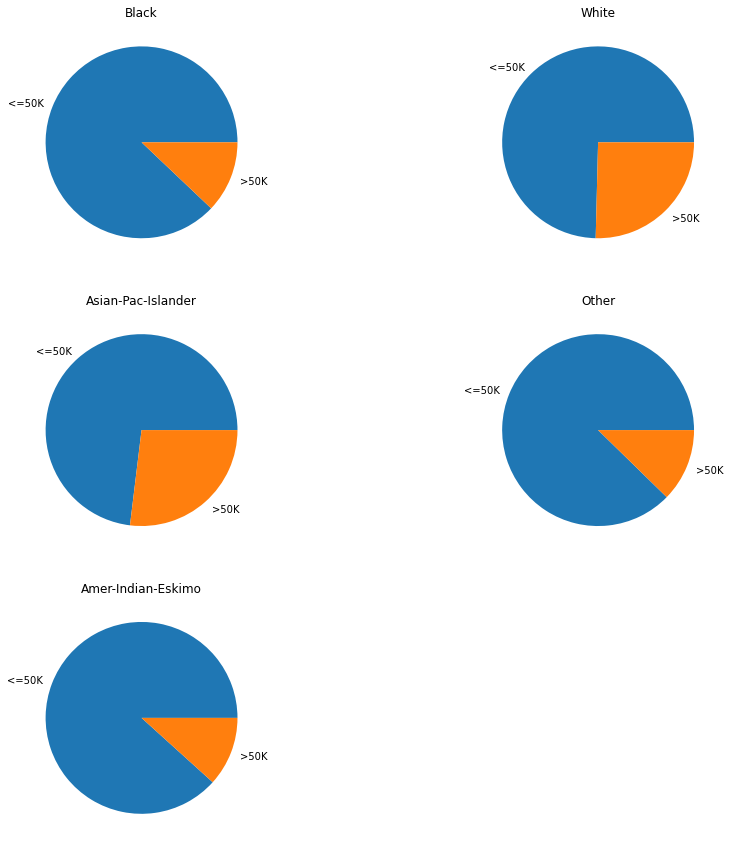

In [13]:

counter = 1
plt.figure(figsize=(15, 15))
for race in races:
    data_here = data[data.race==race]
    plt.subplot(3,2,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True).index)
    plt.title(race)
    counter += 1

In [14]:

educations = list(data.education.unique())

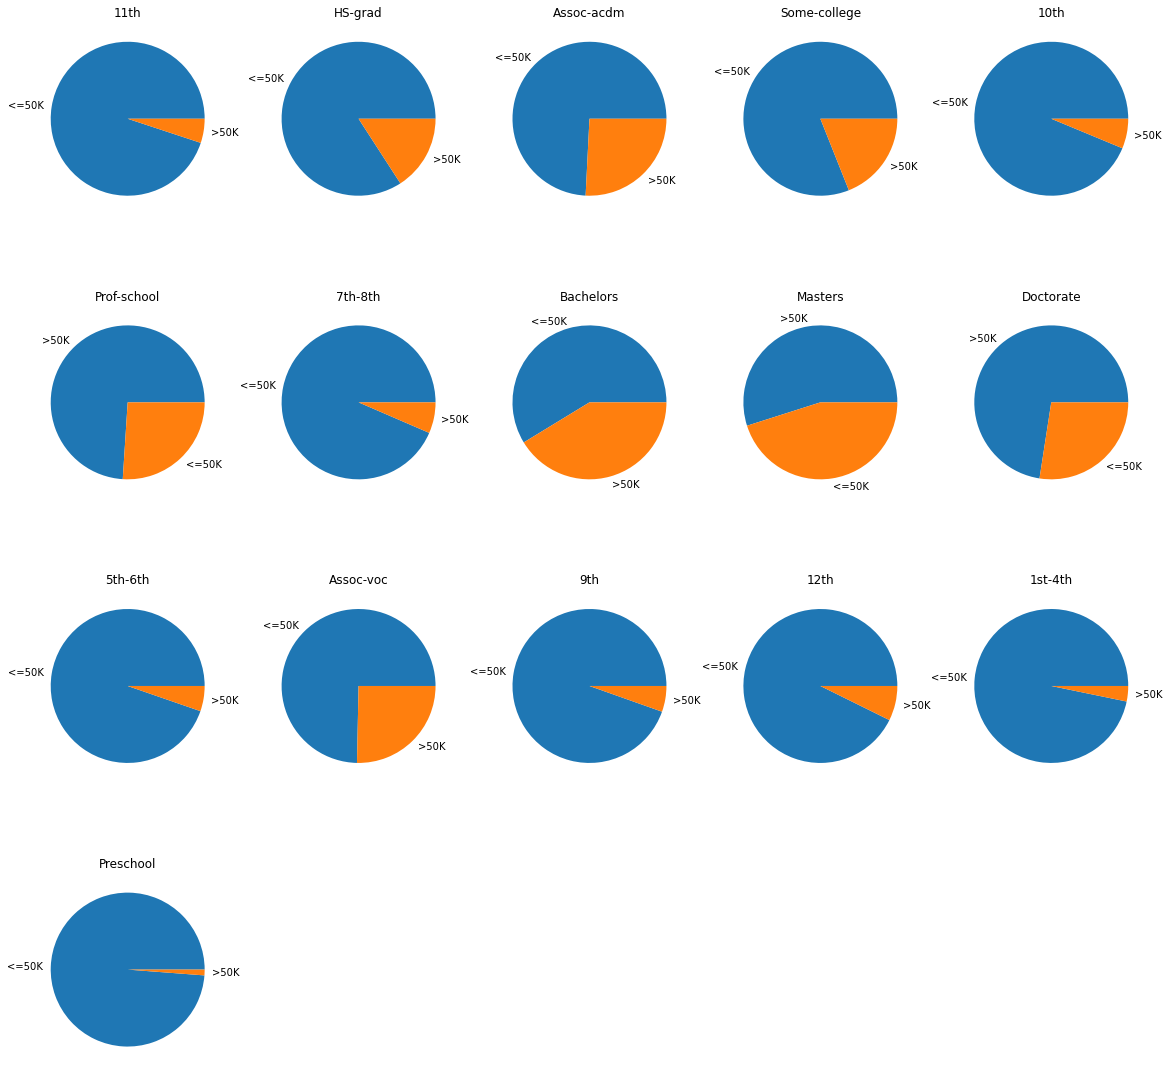

In [15]:

counter = 1
plt.figure(figsize=(20, 20))
for education in educations:
    data_here = data[data.education==education]
    plt.subplot(4,5,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True).index)
    plt.title(education)
    counter += 1

In [16]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [17]:
data.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [18]:

relation = list(data.relationship.unique())

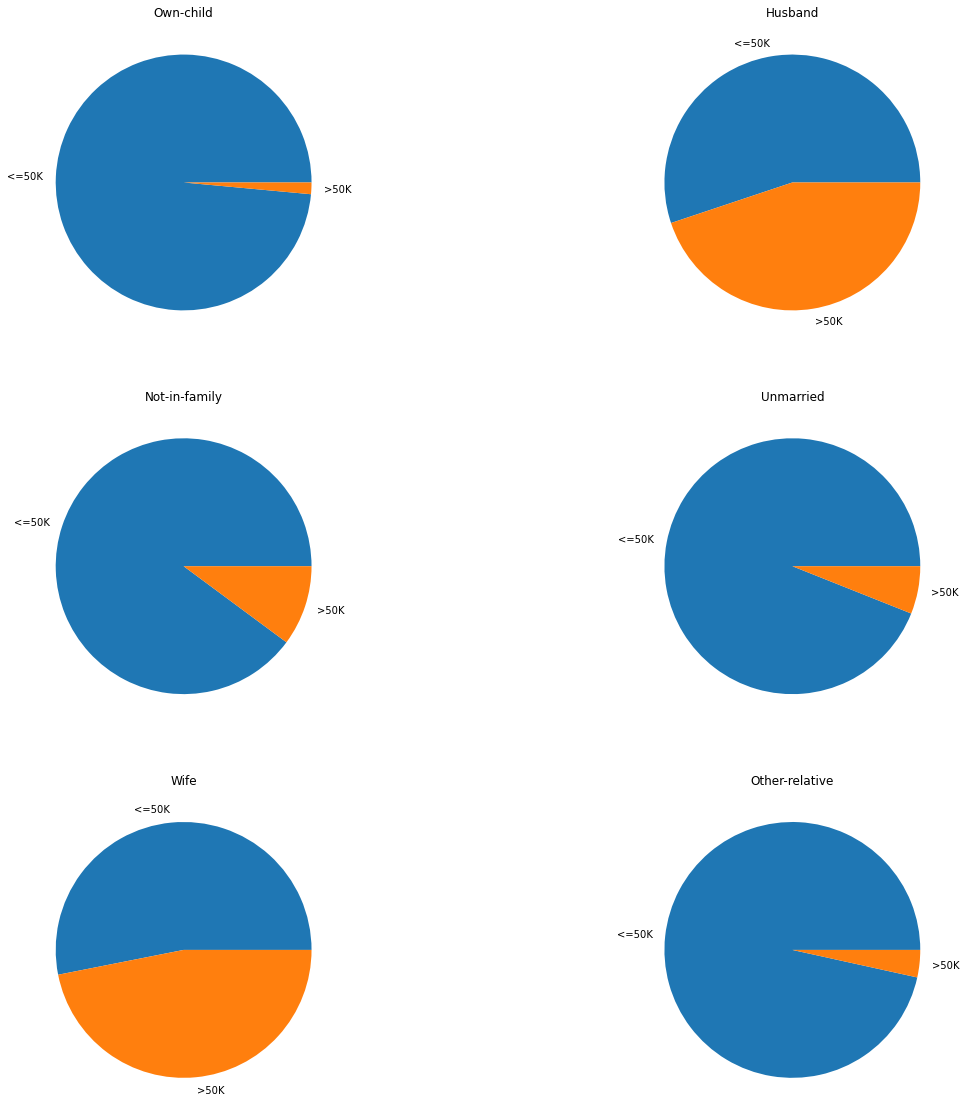

In [22]:
relation = list(data.relationship.unique())
counter = 1
plt.figure(figsize=(20, 20))
for rel in relation:
    data_here = data[data.relationship==rel]
    plt.subplot(3,2,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True).index)
    plt.title(rel)
    counter += 1


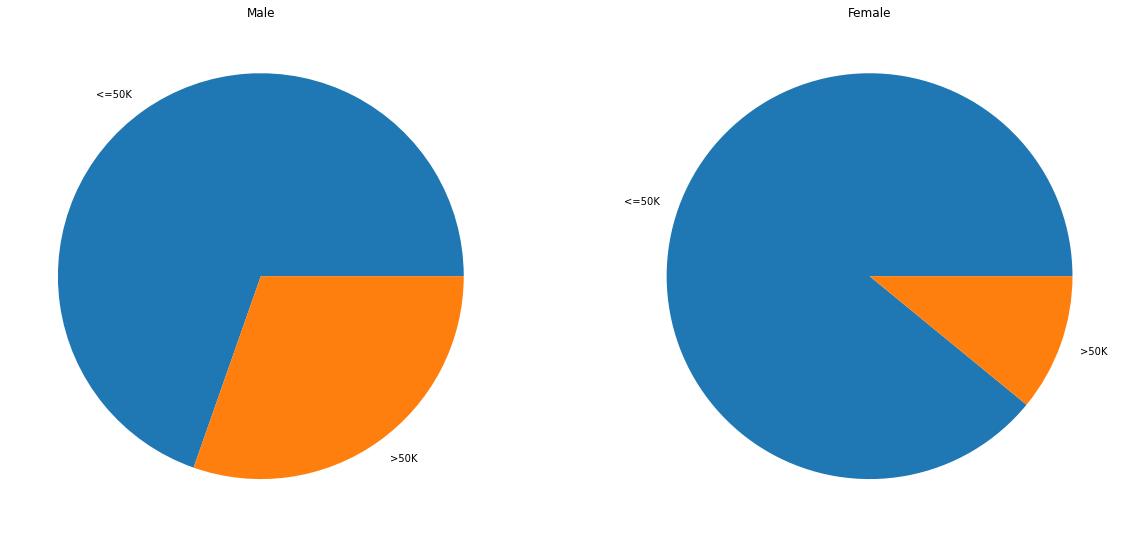

In [24]:

sexes = list(data.gender.unique())
counter = 1
plt.figure(figsize=(20, 20))
for sex in sexes:
    data_here = data[data.gender==sex]
    plt.subplot(1,2,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True).index)
    plt.title(sex)
    counter += 1

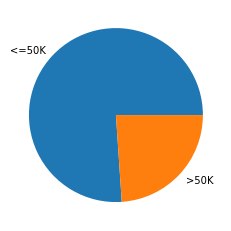

In [25]:

bigd = data.income.value_counts(normalize=True)
plt.pie(bigd, labels=bigd.index)
plt.show()

In [27]:
data['marital-status'].value_counts()


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [29]:
percent={}
for i in data['marital-status'].value_counts().index:
    counts = data[data['marital-status']==i]['income'].value_counts(normalize=True)
    percent[i] = counts

In [30]:
perdf=pd.DataFrame(percent)

In [31]:

perdf.head()

,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
<=50K,0.553867,0.95452,0.898839,0.935294,0.915679,0.907643,0.621622
>50K,0.446133,0.04548,0.101161,0.064706,0.084321,0.092357,0.378378


In [34]:

education_pct = {}
edu_num = data['educational-num'].unique()

for num in edu_num:
    DD = data[data['educational-num']==num]
    pct = len(DD[DD.income=='>50K'])/len(DD)
    education_pct[num] = pct

In [35]:
pct_df = pd.DataFrame.from_dict(education_pct, orient='index')

In [36]:
pct_df.sort_index(inplace=True)

<AxesSubplot:>

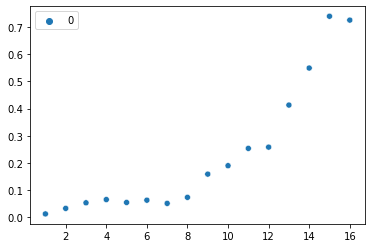

In [37]:
sns.scatterplot(data=pct_df)

In [39]:
data[data['educational-num']>=13].head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
23,25,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K
24,25,Private,205947,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32,24,Self-emp-not-inc,188274,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
36,36,Local-gov,403681,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
40,65,Private,136384,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


In [41]:
len(data['educational-num'].unique())

16